In [1]:
# Procesado y tratamiento de los datos
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceo del dataset
from imblearn.under_sampling import RandomUnderSampler

# División del dataset
from sklearn.model_selection import train_test_split

# Búsqueda de los mejores parámetros
from sklearn.model_selection import GridSearchCV

# Reducción de caraterísticas
from sklearn.decomposition import PCA

# Modelos utilizados 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Métricas de evaluación
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Otros
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Lectura del dataset 
data = pd.read_csv('star_classification.csv')
# Visualización inicial del conjunto de datos
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
# Visualizamos la información básica del conjunto de datos
# Indica el número de filas del dataset
# Muestra el número de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
# Dimensiones del dataset
# Muestra la cantidad de datos y el número de columnas que posee el dataset
data.shape

(100000, 18)

In [5]:
# Validación de datos duplicados
data.duplicated().sum()

0

In [6]:
# Número de datos ausentes por variable
print(data.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [7]:
# Comprobación de la existencia de valores infinitos
is_inf = data.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

In [8]:
# Copiamos el conjunto de datos y transformamos la variable de salida a numérica
df_new = data.copy()
df_new['class'] = df_new['class'].map({'GALAXY':0,'STAR':1,'QSO':2})

In [9]:
# Eliminación de datos que son irrelevantes y que podrian afectar el resultado.
df = df_new.drop(['obj_ID','run_ID','rerun_ID','field_ID','fiber_ID'], axis=1)

In [10]:
# Visualización de la información estadística del conjunto de datos
# Para las variables numéricas
df.describe()

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,class,redshift,plate,MJD
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,3.511610,5.783882e+18,0.595160,0.576661,5137.009660,55588.647500
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1.586912,3.324016e+18,0.787509,0.730707,2952.303351,1808.484233
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,1.000000,2.995191e+17,0.000000,-0.009971,266.000000,51608.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,2.000000,2.844138e+18,0.000000,0.054517,2526.000000,54234.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4.000000,5.614883e+18,0.000000,0.424173,4987.000000,55868.500000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5.000000,8.332144e+18,1.000000,0.704154,7400.250000,56777.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,6.000000,1.412694e+19,2.000000,7.011245,12547.000000,58932.000000


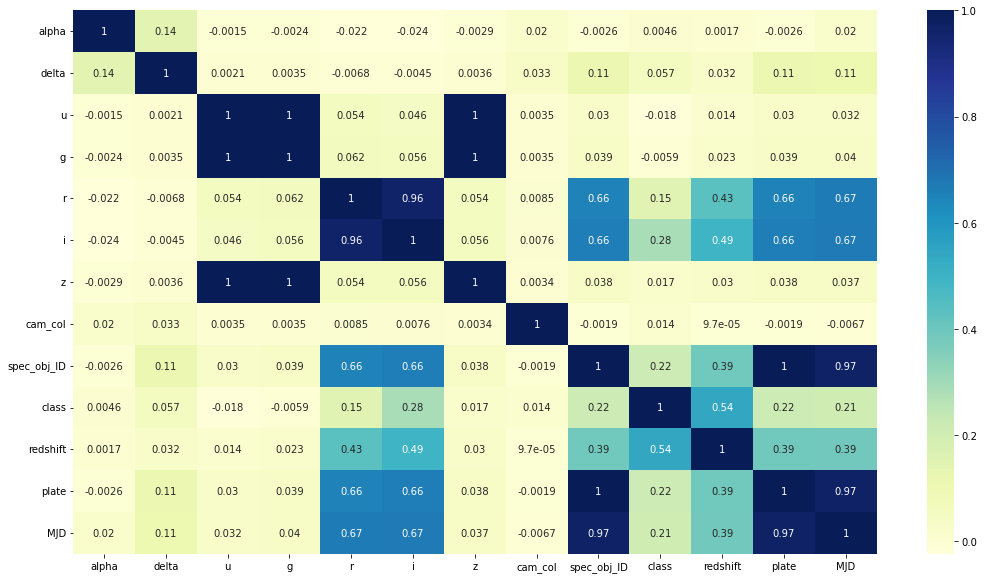

In [11]:
# Validamos correlaciones
correlation = df.corr()
fig = plt.figure (figsize = (18,10))
ax = fig.add_subplot(111)
df.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show() 

In [12]:
# Verificamos cuales son las variables que poseen mas correlación con respecto a la variable de salida
df.corr()['class'].sort_values()

u             -0.017701
g             -0.005915
alpha          0.004552
cam_col        0.014476
z              0.017352
delta          0.056643
r              0.150691
MJD            0.207262
spec_obj_ID    0.215722
plate          0.215722
i              0.284396
redshift       0.536822
class          1.000000
Name: class, dtype: float64

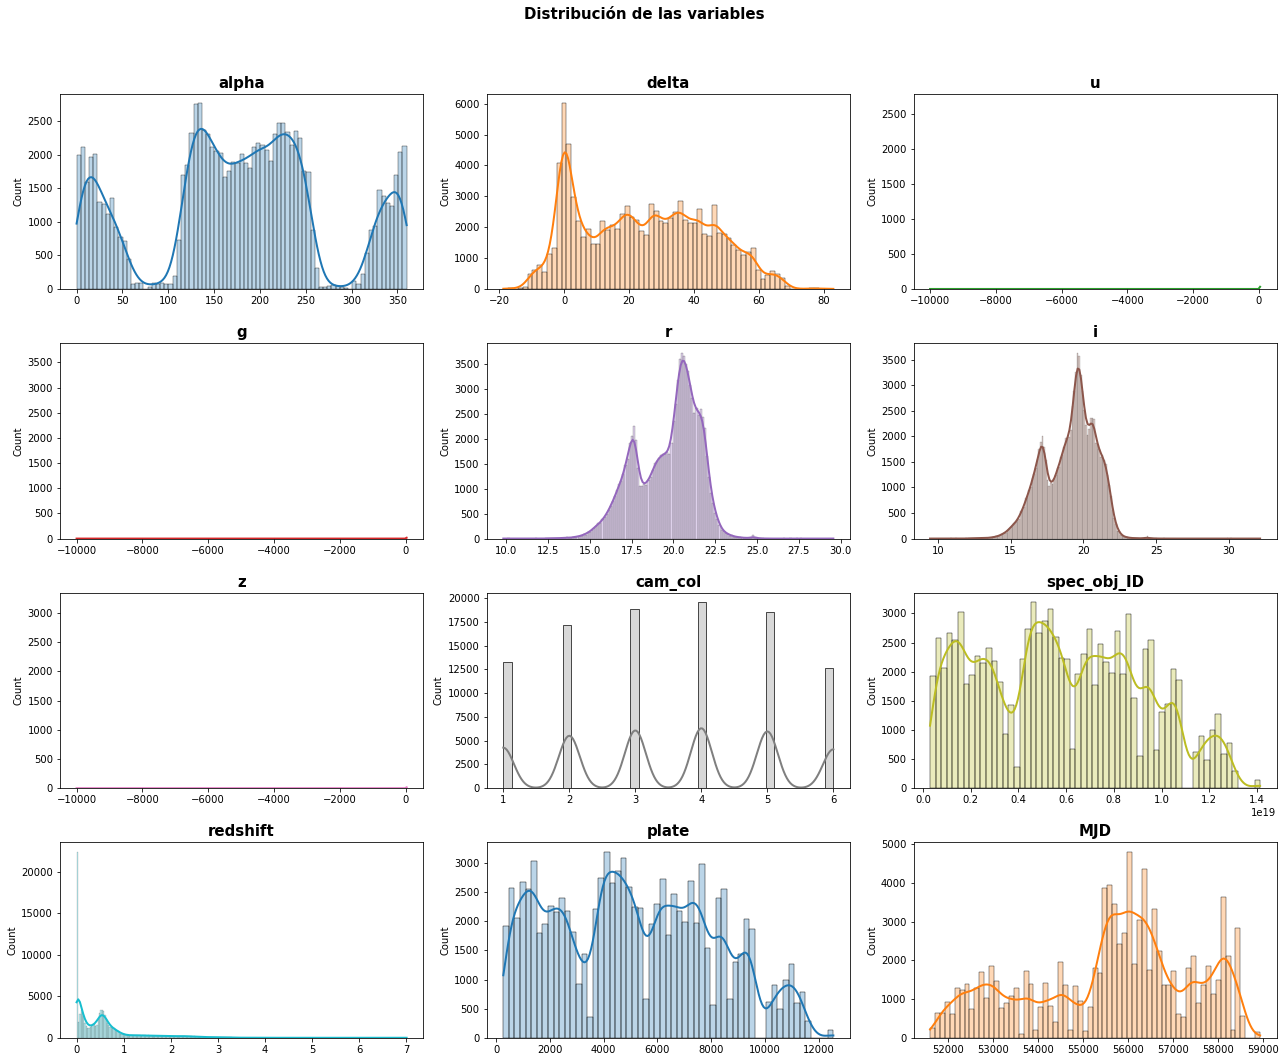

In [13]:
# Gráficas de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18,15))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
# Se elimina la variable de salida
columnas_numeric = columnas_numeric.drop('class')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numeric):
    # Gráficamos cada columna 
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*4)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las variables', fontsize = 15, fontweight = "bold");

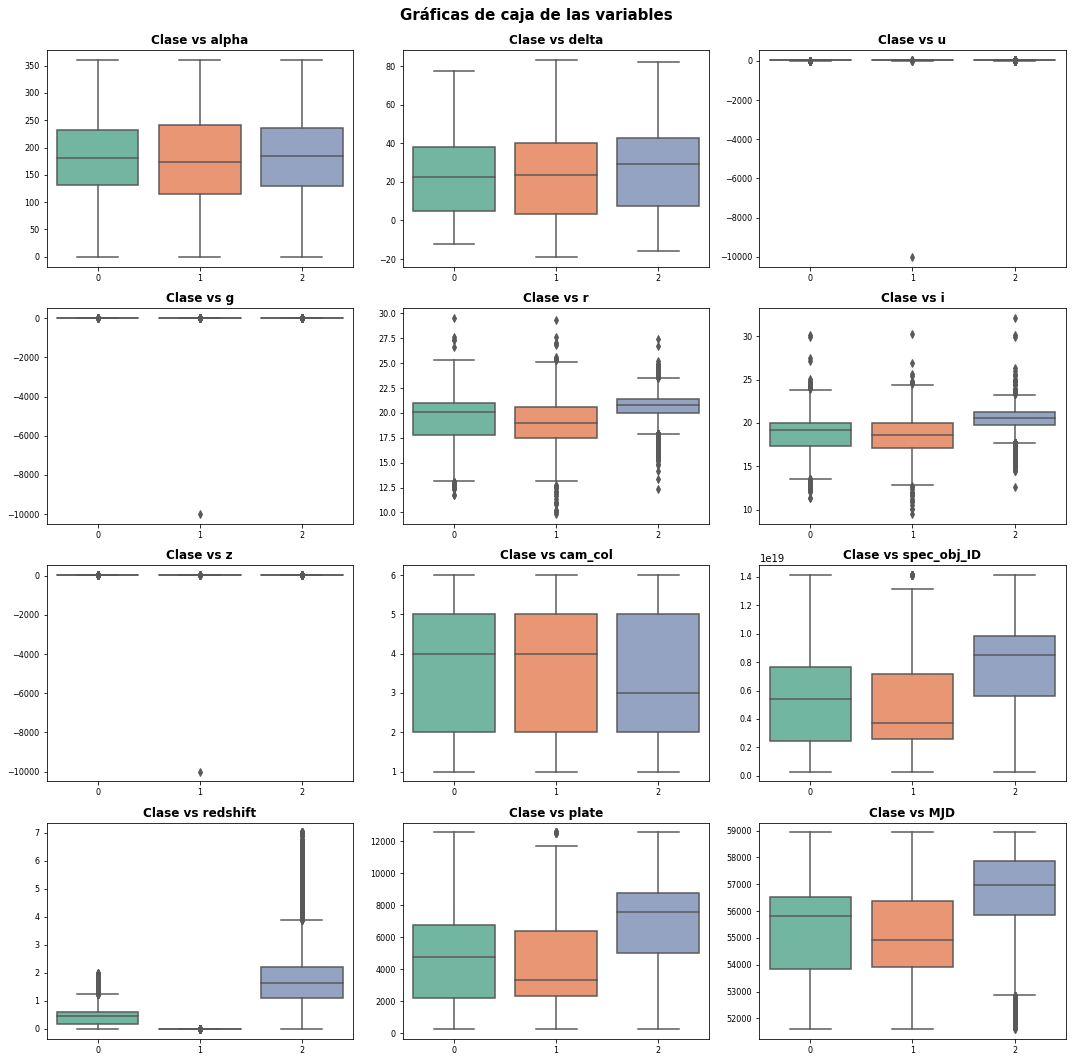

In [14]:
# Gráficas de caja de cada variable según la variable de salida
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
# Se elimina la variable de salida
columnas_numeric = columnas_numeric.drop('class')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numeric):
    # Gráficamos cada columna
    sns.boxplot(
        x     = 'class',
        y     = colum,
        data  = df,
        color = sns.set_palette("Set2"),
        ax    = axes[i]
    )
    axes[i].set_title(f"Clase vs {colum}", fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    
fig.tight_layout()
plt.subplots_adjust(top=0.94)
fig.suptitle('Gráficas de caja de las variables', fontsize = 15, fontweight = "bold");

## Balanceo del dataset

In [15]:
# Del conjunto de datos general separamos la variable de salida del resto de datos
X_df = df.drop("class", axis=1)
y_df = df["class"].copy()

In [16]:
# Validación de la cantidad de ejemplos que posee el dataset según la variable de salida.
df["class"].value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

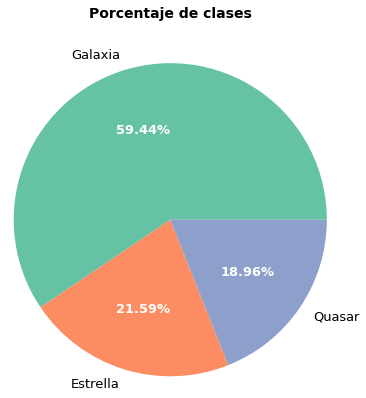

In [17]:
# Creación de una gráfica para representar el porcentaje de las observaciones por clase
Gender = df['class'].value_counts()
names = 'Galaxia','Estrella','Quasar'
fig5, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Porcentaje de clases', y=1.1,  weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

In [18]:
# Inicialización del método de submuestreo
rus = RandomUnderSampler()
# Elimina las muestras de la clase más representada aleatoriamente
X_Rus, y_Rus = rus.fit_resample(X_df,y_df)
# Visualizamos el dataset equilibrado
X_Rus

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate,MJD
0,332.323276,23.147050,22.42906,20.87715,19.11114,18.44326,17.99154,2,6.700258e+18,0.342258,5951,56102
1,336.086662,16.866244,22.75257,21.43513,20.23317,19.41018,18.87378,2,5.663315e+18,0.277896,5030,55830
2,131.771936,50.195312,22.19794,20.16209,18.64004,18.03322,17.63766,6,5.807501e+18,0.267852,5158,55913
3,196.960737,46.168122,24.07599,24.14899,21.76816,20.72203,19.98294,2,8.347635e+18,0.621911,7414,56748
4,348.255221,35.066784,23.15257,23.39748,21.06776,19.68471,19.29723,6,8.039131e+18,0.645962,7140,56569
...,...,...,...,...,...,...,...,...,...,...,...,...
56878,134.347759,47.771911,24.17897,22.89025,21.26451,20.94941,19.87500,4,8.458979e+18,0.219966,7513,56780
56879,222.761686,32.203212,20.23421,19.76480,19.46940,19.36135,19.21768,1,4.356138e+18,0.398574,3869,55273
56880,259.504325,31.462416,24.86685,23.22772,21.82982,21.80359,21.56733,5,1.312146e+19,1.239638,11654,58543
56881,217.958430,52.316738,24.15617,22.05986,21.80826,21.95129,21.24179,2,7.916218e+18,1.067543,7031,56449


In [19]:
# Función para gráficar el diagrama de probabilidad normal de cada variable y verificar si siguen una distribución normal 
def normalidad_variable_numerica(col):
    stats.probplot(X_Rus[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

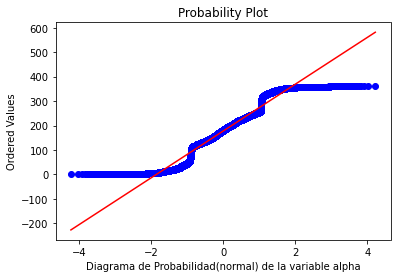

Columna alpha no sigue una distribución normal


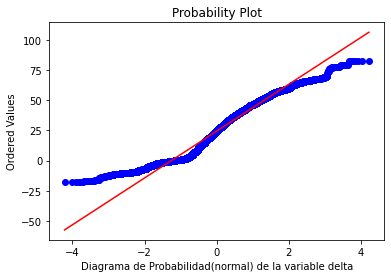

Columna delta no sigue una distribución normal


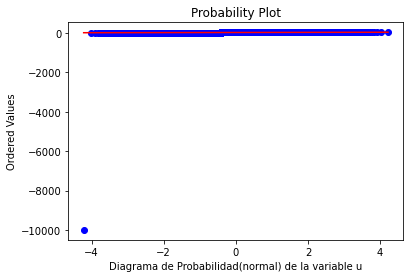

Columna u no sigue una distribución normal


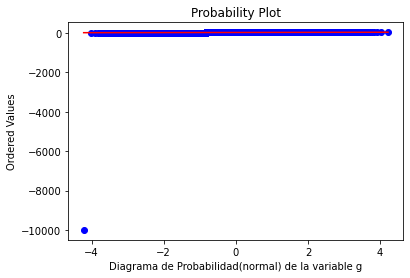

Columna g no sigue una distribución normal


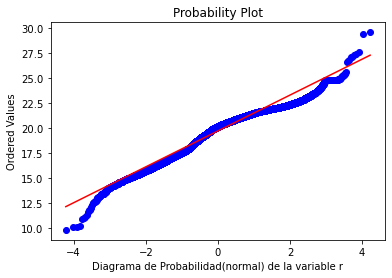

Columna r no sigue una distribución normal


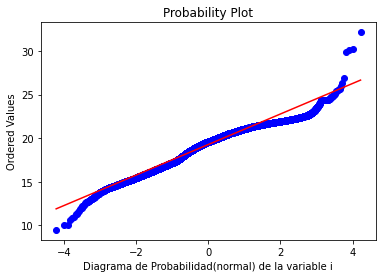

Columna i no sigue una distribución normal


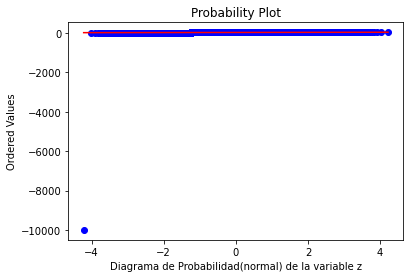

Columna z no sigue una distribución normal


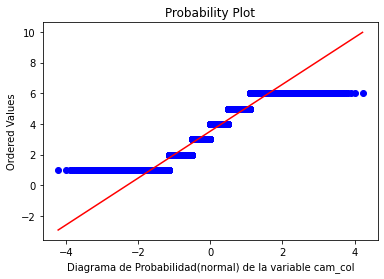

Columna cam_col no sigue una distribución normal


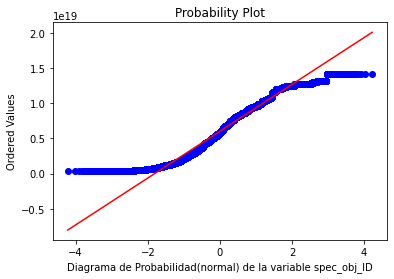

Columna spec_obj_ID no sigue una distribución normal


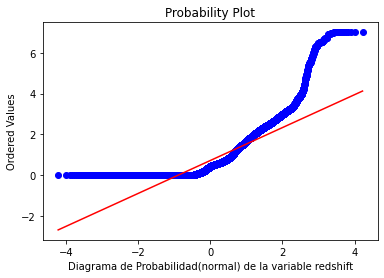

Columna redshift no sigue una distribución normal


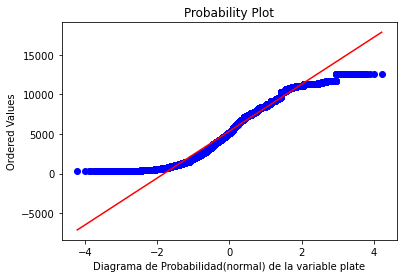

Columna plate no sigue una distribución normal


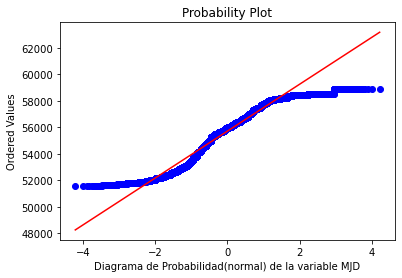

Columna MJD no sigue una distribución normal


In [20]:
# Seleccionamos las columnas a graficar
columnas_numericas = X_Rus.select_dtypes(['int', 'float']).columns
# Recorremos cada columna
for num_col in columnas_numericas:
    _, pval = stats.normaltest(X_Rus[num_col])
    normalidad_variable_numerica(num_col)
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

In [21]:
# Inicializamos el método de transformación
scaler= QuantileTransformer(output_distribution="uniform")
# Pasamos las varibles que serán transformadas
X_scaled = scaler.fit_transform(X_Rus)
# Transformación a un DataFrame de Pandas
X_scaled = pd.DataFrame(X_scaled, columns=X_Rus.columns, index=X_Rus.index)
#Visualización de los cambios
X_scaled

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate,MJD
0,0.898732,0.481551,0.630089,0.502940,0.330779,0.294760,0.274752,0.215215,0.557004,0.473797,0.557012,0.552553
1,0.910529,0.387975,0.683228,0.636111,0.513319,0.456639,0.413733,0.215215,0.485129,0.453501,0.485152,0.463463
2,0.290004,0.890538,0.588629,0.378378,0.273133,0.248524,0.233916,1.000000,0.498755,0.450836,0.498749,0.486486
3,0.571937,0.832719,0.845792,0.984241,0.905264,0.767537,0.679608,0.215215,0.710729,0.622397,0.710711,0.696196
4,0.944635,0.655034,0.741641,0.960035,0.740265,0.524353,0.512427,1.000000,0.670333,0.633491,0.670337,0.652152
...,...,...,...,...,...,...,...,...,...,...,...,...
56878,0.306314,0.861077,0.855264,0.923896,0.789260,0.818782,0.651721,0.588088,0.722742,0.438667,0.722743,0.705706
56879,0.685693,0.609713,0.254676,0.328634,0.381108,0.446722,0.493242,0.000000,0.351762,0.493929,0.351852,0.339339
56880,0.847351,0.599534,0.913557,0.950261,0.917585,0.966920,0.950632,0.774775,0.997998,0.769959,0.997998,0.997998
56881,0.660554,0.913358,0.853287,0.799551,0.913467,0.979868,0.909687,0.215215,0.656655,0.741730,0.656657,0.637365


In [22]:
# Unimos nuevamente la variable de salida al dataset para poder realizar la división de los datos
data_clean= pd.concat([X_scaled,y_Rus], axis=1,sort=True)
# Visualizamos los cambios aplicados
data_clean

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate,MJD,class
0,0.898732,0.481551,0.630089,0.502940,0.330779,0.294760,0.274752,0.215215,0.557004,0.473797,0.557012,0.552553,0
1,0.910529,0.387975,0.683228,0.636111,0.513319,0.456639,0.413733,0.215215,0.485129,0.453501,0.485152,0.463463,0
2,0.290004,0.890538,0.588629,0.378378,0.273133,0.248524,0.233916,1.000000,0.498755,0.450836,0.498749,0.486486,0
3,0.571937,0.832719,0.845792,0.984241,0.905264,0.767537,0.679608,0.215215,0.710729,0.622397,0.710711,0.696196,0
4,0.944635,0.655034,0.741641,0.960035,0.740265,0.524353,0.512427,1.000000,0.670333,0.633491,0.670337,0.652152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56878,0.306314,0.861077,0.855264,0.923896,0.789260,0.818782,0.651721,0.588088,0.722742,0.438667,0.722743,0.705706,2
56879,0.685693,0.609713,0.254676,0.328634,0.381108,0.446722,0.493242,0.000000,0.351762,0.493929,0.351852,0.339339,2
56880,0.847351,0.599534,0.913557,0.950261,0.917585,0.966920,0.950632,0.774775,0.997998,0.769959,0.997998,0.997998,2
56881,0.660554,0.913358,0.853287,0.799551,0.913467,0.979868,0.909687,0.215215,0.656655,0.741730,0.656657,0.637365,2


## División del conjunto de datos

In [23]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [24]:
# Division del conjunto de datos en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(data_clean, stratify='class')

In [25]:
# Verificamos las particiones realizadas
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 34129
Longitud del Validation Set: 11377
Longitud del Test Set: 11377


In [26]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("class", axis=1)
y_train = train_set["class"].copy()

In [27]:
# Conjunto de datos de pruebas
X_val = val_set.drop("class", axis=1)
y_val = val_set["class"].copy()

In [28]:
# Conjunto de datos de test
X_test = test_set.drop("class", axis=1)
y_test = test_set["class"].copy()

## Selección de los mejores modelos

In [29]:
# Pruebas con diferentes modelos 
models = []
models.append(['Logistic Regreesion', LogisticRegression()])
models.append(['SVM', SVC()])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])
models.append(['Ada Boost', AdaBoostClassifier()])

# Entrenamiento de los diferentes modelos
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # Evaluación de los diferentes modelos
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

Logistic Regreesion: 95.35% (0.35%)
SVM: 96.21% (0.36%)
KNeighbors: 94.50% (0.43%)
GaussianNB: 80.28% (0.54%)
BernoulliNB: 33.27% (0.80%)
Decision Tree: 95.62% (0.32%)
Random Forest: 97.17% (0.28%)
Ada Boost: 84.22% (8.97%)


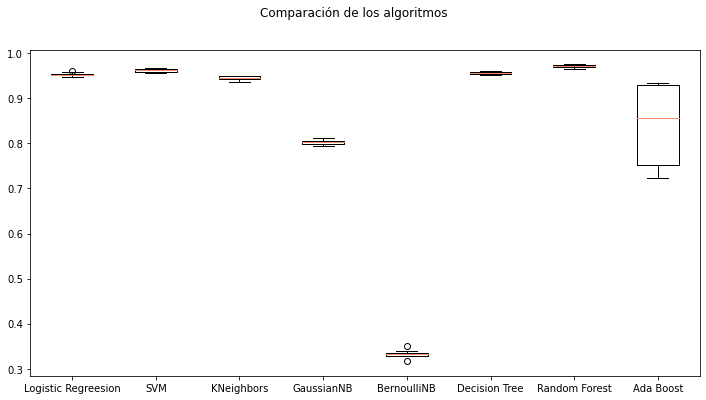

In [30]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig14 = plt.figure(figsize =(12,6))
fig14.suptitle('Comparación de los algoritmos')
ax = fig14.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hiperparametrización de los mejores modelos

In [31]:
# Búsqueda de los mejores parámetros para "LogisticRegression"
parameters1 = {"penalty" : ["l1", "l2", "elasticnet", None],
              "random_state": [0, 3, 5, 7, 10, None],
              "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
              }

model_LogisticRegreesion = LogisticRegression()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid = GridSearchCV(estimator=model_LogisticRegreesion, param_grid=parameters1, cv=kFold, return_train_score=True)
grid_result1= grid.fit(X_train, y_train)

# mejores parámetros
grid_result1.best_params_

{'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}

In [32]:
# Búsqueda de los mejores parámetros para "SVM"
parameters2 = {"C": [1.0, 1.5, 2.0, 2.5],
              "kernel": ["linear","poly","rbf","sigmoid"]
              }

model_SVC = SVC()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid2 = GridSearchCV(estimator=model_SVC, param_grid=parameters2, cv=kFold, return_train_score=True)
grid_result2= grid2.fit(X_train, y_train)

# mejores parámetros
grid_result2.best_params_

{'C': 2.5, 'kernel': 'rbf'}

In [33]:
# Búsqueda de los mejores parámetros para "Árboles de decisión"
parameters3 = {"max_depth": [1, 2, 3, None],
              "splitter": ["best", "random"],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_DTC = DecisionTreeClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid3 = GridSearchCV(estimator=model_DTC, param_grid=parameters3, cv=kFold, return_train_score=True)
grid_result3= grid3.fit(X_train, y_train)

# mejores parámetros
grid_result3.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'splitter': 'best'}

In [34]:
# Búsqueda de los mejores parámetros para "Bosques aleatorios"
parameters4 = {"max_depth": [1, 2, 3, None],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_RFC = RandomForestClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid4 = GridSearchCV(estimator=model_RFC, param_grid=parameters4, cv=kFold, return_train_score=True)
grid_result4= grid4.fit(X_train, y_train)

# mejores parámetros
grid_result4.best_params_

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 3}

## Evaluación del mejor modelo

In [35]:
# Prueba de los mejores modelos con los parámetros encontrados
models_hiper = []
models_hiper.append(['Logistic Regreesion', LogisticRegression(**grid_result1.best_params_)])
models_hiper.append(['SVM', SVC(**grid_result2.best_params_)])
models_hiper.append(['Decision Tree', DecisionTreeClassifier(**grid_result3.best_params_)])
models_hiper.append(['Random Forest', RandomForestClassifier(**grid_result4.best_params_)])

# Entrenamiento de los modelos
results2 = []
names2 = []
scoring2 = 'accuracy'
for name, model in models_hiper:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results2 = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring2)
    results2.append(cv_results2)
    names2.append(name)
    # Evaluación de los diferentes modelos
    print(f"{name}: {cv_results2.mean()*100.0:,.2f}% ({cv_results2.std()*100.0:,.2f}%)")

Logistic Regreesion: 95.56% (0.31%)
SVM: 96.33% (0.35%)
Decision Tree: 94.71% (0.81%)
Random Forest: 97.28% (0.21%)


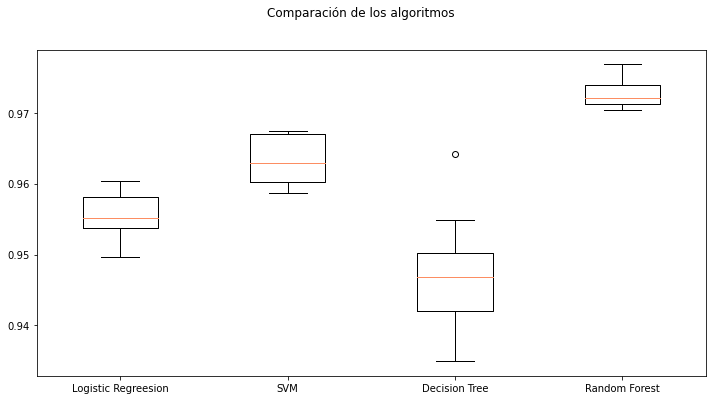

In [36]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig15 = plt.figure(figsize =(12,6))
fig15.suptitle('Comparación de los algoritmos')
ax = fig15.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [37]:
# Entrenamiento y prueba con el mejor modelo 
# Inicializamos el modelo 
mejor_modelo = RandomForestClassifier(**grid_result4.best_params_)
# Le pasamos los datos de entrenamiento 
mejor_modelo.fit(X_train,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred = mejor_modelo.predict(X_val)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_val, y_pred)

0.9753010459699394

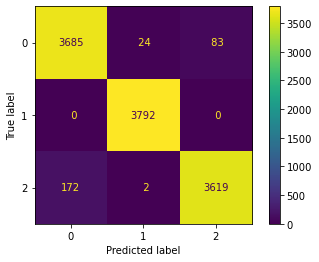

In [38]:
# Resultados de la matriz de confusión con los datos de prueba 
plot_confusion_matrix(mejor_modelo, X_val, y_val, values_format='3g')

In [39]:
# Reporte de los resultados que se obtuvieron con los datos de prueba 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3792
           1       0.99      1.00      1.00      3792
           2       0.98      0.95      0.97      3793

    accuracy                           0.98     11377
   macro avg       0.98      0.98      0.98     11377
weighted avg       0.98      0.98      0.98     11377



In [40]:
# Realizamos una nueva predición con los datos de test
y_pred2 = mejor_modelo.predict(X_test)

# Evaluamos el rendimiento del modelo con los datos de test
accuracy_score(y_test, y_pred2)

0.9745978729014678

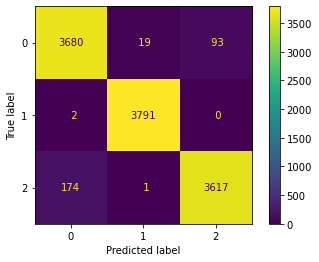

In [41]:
# Resultados de la matriz de confusión con los datos de test
plot_confusion_matrix(mejor_modelo, X_test, y_test, values_format='3g')

In [42]:
# Reporte de los resultados que se obtuvieron con los datos de test
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3792
           1       0.99      1.00      1.00      3793
           2       0.97      0.95      0.96      3792

    accuracy                           0.97     11377
   macro avg       0.97      0.97      0.97     11377
weighted avg       0.97      0.97      0.97     11377



## Reducción de características

In [43]:
# Obtener la lista de modelos
def get_models():
    models = dict()
    for i in range(1,13):
        steps = [('pca', PCA(n_components=i)), ('r', RandomForestClassifier(**grid_result4.best_params_))]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [44]:
# Método de entrenamiento
def evaluate_model(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
models = get_models()

In [45]:
# Evaluamos los resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>1 0.430 (0.009)
>2 0.515 (0.008)
>3 0.586 (0.011)
>4 0.713 (0.007)
>5 0.861 (0.006)
>6 0.894 (0.006)
>7 0.958 (0.003)
>8 0.960 (0.004)
>9 0.960 (0.004)
>10 0.960 (0.003)
>11 0.960 (0.003)
>12 0.960 (0.003)


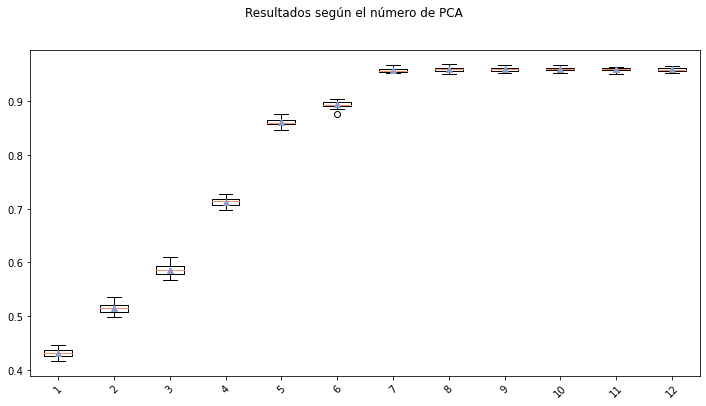

In [46]:
# Visualizamos los resultados
fig16 = plt.figure(figsize =(12,6))
fig16.suptitle('Resultados según el número de PCA')
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [47]:
# Entrenamiento y prueba del modelo final
# Inicializamos el modelo 
steps2 = [('pca', PCA(n_components=8)), ('RFC', RandomForestClassifier(**grid_result4.best_params_))]
modelo_final = Pipeline(steps=steps2)
# Ajuste del modelo
modelo_final.fit(X_train,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred3 = modelo_final.predict(X_val)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_val, y_pred3)

0.9618528610354223

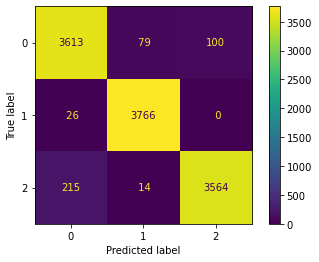

In [48]:
# Resultados de la matriz de confusión con los datos de prueba 
plot_confusion_matrix(modelo_final, X_val, y_val, values_format='3g')

In [49]:
# Reporte de los resultados que se obtuvieron con los datos de prueba 
print(classification_report(y_val, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3792
           1       0.98      0.99      0.98      3792
           2       0.97      0.94      0.96      3793

    accuracy                           0.96     11377
   macro avg       0.96      0.96      0.96     11377
weighted avg       0.96      0.96      0.96     11377



In [50]:
# Realizamos una nueva predición con los datos de test
y_pred4 = modelo_final.predict(X_test)

# Evaluamos el rendimiento del modelo con los datos de test
accuracy_score(y_test, y_pred4)

0.9626439307374528

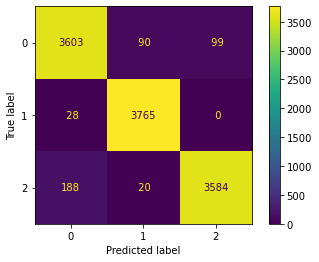

In [51]:
# Resultados de la matriz de confusión con los datos de test
plot_confusion_matrix(modelo_final, X_test, y_test, values_format='3g')

In [52]:
# Reporte de los resultados que se obtuvieron con los datos de test
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3792
           1       0.97      0.99      0.98      3793
           2       0.97      0.95      0.96      3792

    accuracy                           0.96     11377
   macro avg       0.96      0.96      0.96     11377
weighted avg       0.96      0.96      0.96     11377

